# Superstore Performance Dashboard - Exploratory and Descriptive Analysis

In this notebook, we perform an in-depth exploratory and descriptive analysis of the **Superstore Performance Dataset**, a rich dataset capturing retail transaction details across various product categories, regions, and customer segments.

This phase of analysis is crucial for uncovering trends, identifying potential business insights, and gaining a solid understanding of the dataset’s structure before developing visual dashboards or advanced analytics. We explore the distribution of key numerical and categorical variables, examine relationships between sales performance metrics (such as sales, profit, and quantity) and business dimensions (such as region, category, and customer segment), and use visualizations to highlight important patterns. Particular focus is placed on sales performance across regions, product categories, and return behavior, helping to build a strong foundation for actionable recommendations and strategic decision-making.

We begin our analysis by importing the core Python libraries required for data processing, numerical computation, visualization, and directory management:

- **pandas**: Enables efficient manipulation, filtering, and aggregation of structured tabular data, forming the backbone of our analysis pipeline.
- **numpy**: Provides support for numerical operations, array-based computations, and statistical summaries.
- **os**: Facilitates interaction with the file system, allowing us to build flexible and portable directory paths for data and output management.
- **plotly.express**: A high-level graphing library that enables creation of interactive, publication-quality visualizations, which we use extensively to uncover patterns and present insights throughout the notebook.


In [3]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 1. Define and Create Directory Paths

To ensure reproducibility and organized storage, we programmatically create directories if they don't already exist for:

- **raw data**
- **processed data**
- **results**
- **documentation**

These directories will store intermediate and final outputs for reproducibility.


In [4]:
# Get working directory
current_dir = os.getcwd()
# Go one directory up to the root directory
project_root_dir = os.path.dirname(current_dir)
# define paths to the data files
data_dir = os.path.join(project_root_dir, 'data')
raw_dir = os.path.join(data_dir, 'raw')
processed_dir = os.path.join(data_dir, 'processed')
# Define paths to the results folder
results_dir  = os.path.join(project_root_dir, 'results')
# Define paths to the docs folder
docs_dir = os.path.join(project_root_dir, 'docs')

# create directories if they do not exist 
os.makedirs(raw_dir, exist_ok = True )
os.makedirs(processed_dir, exist_ok = True )
os.makedirs(results_dir, exist_ok = True)
os.makedirs(docs_dir, exist_ok = True)

## 2. Loading the Cleaned Dataset

We load the cleaned version of the **Superstore Performance Dataset** from the processed data directory into a Pandas DataFrame. The `head(10)` function displays the first ten records, providing a quick look at key columns such as `Customer ID`, `Segment`, `Country`, `Category`, `Sales`, `Profit`, and `Returned`.


In [5]:
store_data_filename = os.path.join(processed_dir, "SuperStore-Cleaned.csv")
super_df = pd.read_csv(store_data_filename)
super_df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned,Person
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,NO,Cassandra Brandow
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,NO,Cassandra Brandow
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,NO,Anna Andreadi
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,NO,Cassandra Brandow
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,NO,Cassandra Brandow
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,NO,Anna Andreadi
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,NO,Anna Andreadi
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,NO,Anna Andreadi
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,NO,Anna Andreadi
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,NO,Anna Andreadi


## 3. RFM Metrics

RFM is a way to analyze customer behavior using **three separate dimensions**:

1. **Recency (R)** — How recently a customer made a purchase  
   - Lower number = more recent purchase  
   - Example: Customer who bought yesterday is more **recent** than one who bought 6 months ago  

2. **Frequency (F)** — How often a customer makes purchases  
   - Higher number = more frequent buyer  
   - Example: Customer who bought 10 times in the last year is more frequent than one who bought once  

3. **Monetary (M)** — How much money a customer has spent  
   - Higher number = bigger spender  
   - Example: Customer who spent **500** is higher value than one who spent **50**  

We calculate for each customer:
- **Recency:** Number of days since their last purchase  
- **Frequency:** Total number of orders placed  
- **Monetary:** Total amount of money spent

These metrics help us **score and segment customers** to target them with the right marketing actions.


In [16]:
super_df['Order Date'] = pd.to_datetime(super_df['Order Date'])

reference_date = super_df['Order Date'].max() + timedelta(days=1)

rfm = super_df.groupby('Customer ID').agg({
    'Order Date': lambda x: (reference_date - x.max()).days,  
    'Order ID': 'nunique',                                   
    'Sales': 'sum'                                           
}).reset_index()

rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

rfm = rfm.merge(super_df[['Customer ID', 'Customer Name']].drop_duplicates(), on='Customer ID', how='left')

rfm.head(6)


,Customer ID,Recency,Frequency,Monetary,Customer Name
0,AA-10315,185,5,5563.560,Alex Avila
1,AA-10375,20,9,1056.390,Allen Armold
2,AA-10480,260,4,1790.512,Andrew Allen
3,AA-10645,56,6,5086.935,Anna Andreadi
4,AB-10015,416,3,886.156,Aaron Bergman
5,AB-10060,55,8,7755.620,Adam Bellavance


## 4. Assign RFM Scores
We assign scores from 1 to 5 for each metric:
- Recency → more recent = higher score
- Frequency → more purchases = higher score
- Monetary → more spending = higher score

Then we combine them into a single `RFM_Score` like **555**, **421**, **331**, **114** etc.


In [26]:
def score_rfm(x, ascending):
    return pd.qcut(x.rank(method='first', ascending=ascending), 5, labels=[1,2,3,4,5])

rfm['R_Score'] = score_rfm(rfm['Recency'], ascending=True)
rfm['F_Score'] = score_rfm(rfm['Frequency'], ascending=False)
rfm['M_Score'] = score_rfm(rfm['Monetary'], ascending=False)

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm.head(30)


,Customer ID,Recency,Frequency,Monetary,Customer Name,R_Score,F_Score,M_Score,RFM_Score,Segment
0,AA-10315,185,5,5563.5600,Alex Avila,4,3,1,431,Loyal Customers
1,AA-10375,20,9,1056.3900,Allen Armold,1,1,4,114,Others
2,AA-10480,260,4,1790.5120,Andrew Allen,5,4,3,543,Loyal Customers
3,AA-10645,56,6,5086.9350,Anna Andreadi,3,3,1,331,Others
4,AB-10015,416,3,886.1560,Aaron Bergman,5,5,5,555,Champions
5,AB-10060,55,8,7755.6200,Adam Bellavance,3,2,1,321,Others
6,AB-10105,42,10,14473.5710,Adrian Barton,2,1,1,211,Lost
7,AB-10150,42,5,966.7100,Aimee Bixby,2,3,4,234,Others
8,AB-10165,26,8,1113.8380,Alan Barnes,1,2,4,124,Others
9,AB-10255,167,9,914.5320,Alejandro Ballentine,4,1,5,415,New Customers


## 5.Customer Segmentation
Based on the RFM scores, we group customers into meaningful segments such as:
- **Champions:** Recently purchased, frequent, and high spenders  
- **Loyal Customers:** Buy often, spend well  
- **Potential Loyalists:** Promising buyers  
- **At Risk:** Haven’t purchased in a while  
- **Lost Customers:** Long time since purchase, low frequency/spending


In [20]:
def assign_segment(row):
    r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 4 and f >= 3:
        return 'Loyal Customers'
    elif r >= 4 and f <= 2:
        return 'New Customers'
    elif r <= 2 and f >= 4:
        return 'At Risk'
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Lost'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(assign_segment, axis=1)

rfm.head(6)


,Customer ID,Recency,Frequency,Monetary,Customer Name,R_Score,F_Score,M_Score,RFM_Score,Segment
0,AA-10315,185,5,5563.560,Alex Avila,4,3,1,431,Loyal Customers
1,AA-10375,20,9,1056.390,Allen Armold,1,1,4,114,Others
2,AA-10480,260,4,1790.512,Andrew Allen,5,4,3,543,Loyal Customers
3,AA-10645,56,6,5086.935,Anna Andreadi,3,3,1,331,Others
4,AB-10015,416,3,886.156,Aaron Bergman,5,5,5,555,Champions
5,AB-10060,55,8,7755.620,Adam Bellavance,3,2,1,321,Others


## 6 Assign Marketing Ideas

In this step, we create a dictionary of simple marketing strategies for each customer segment.  
Then, we map these ideas to each customer based on their RFM segment.

This helps businesses quickly decide how to interact with each customer group — for example:
- **Champions:** Give exclusive discounts or VIP rewards  
- **Loyal Customers:** Offer loyalty points or free gifts  
- **New Customers:** Send welcome emails and first-time coupons  
- **At Risk:** Send win-back offers or gentle reminders  
- **Lost:** Try re-engagement campaigns or surveys  
- **Others:** Include them in general promotions or newsment', 'Marketing Idea']]
deals


In [14]:
marketing_ideas = {
    'Champions': 'Give exclusive discounts or VIP rewards.',
    'Loyal Customers': 'Offer loyalty points or free gifts.',
    'New Customers': 'Send welcome emails and first-time coupons.',
    'At Risk': 'Send win-back offers or reminders.',
    'Lost': 'Try re-engagement campaigns or surveys.',
    'Others': 'General promotions and newsletters.'
}

rfm['Marketing Idea'] = rfm['Segment'].map(marketing_ideas)

rfm[['Customer Name', 'Recency', 'Frequency', 'Monetary', 'Segment', 'Marketing Idea']]


,Customer Name,Recency,Frequency,Monetary,Segment,Marketing Idea
0,Alex Avila,185,5,5563.560,Loyal Customers,Offer loyalty points or free gifts.
1,Allen Armold,20,9,1056.390,Others,General promotions and newsletters.
2,Andrew Allen,260,4,1790.512,Loyal Customers,Offer loyalty points or free gifts.
3,Anna Andreadi,56,6,5086.935,Others,General promotions and newsletters.
4,Aaron Bergman,416,3,886.156,Champions,Give exclusive discounts or VIP rewards.
...,...,...,...,...,...,...
788,Xylona Preis,44,11,2374.658,Others,General promotions and newsletters.
789,Yoseph Carroll,5,5,5454.350,At Risk,Send win-back offers or reminders.
790,Yana Sorensen,10,8,6720.444,Lost,Try re-engagement campaigns or surveys.
791,Zuschuss Carroll,55,13,8025.707,Others,General promotions and newsletters.


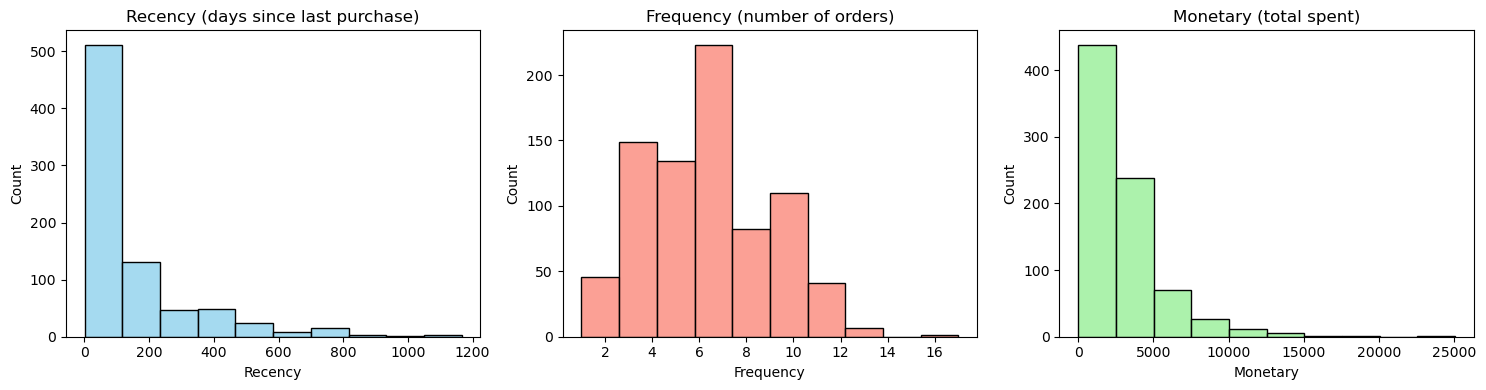

In [21]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins=10, kde=False, color='skyblue')
plt.title('Recency (days since last purchase)')

plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins=10, kde=False, color='salmon')
plt.title('Frequency (number of orders)')

plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins=10, kde=False, color='lightgreen')
plt.title('Monetary (total spent)')

plt.tight_layout()
plt.show()


C:\Users\Tasha\AppData\Local\Temp\ipykernel_15352\2297968903.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


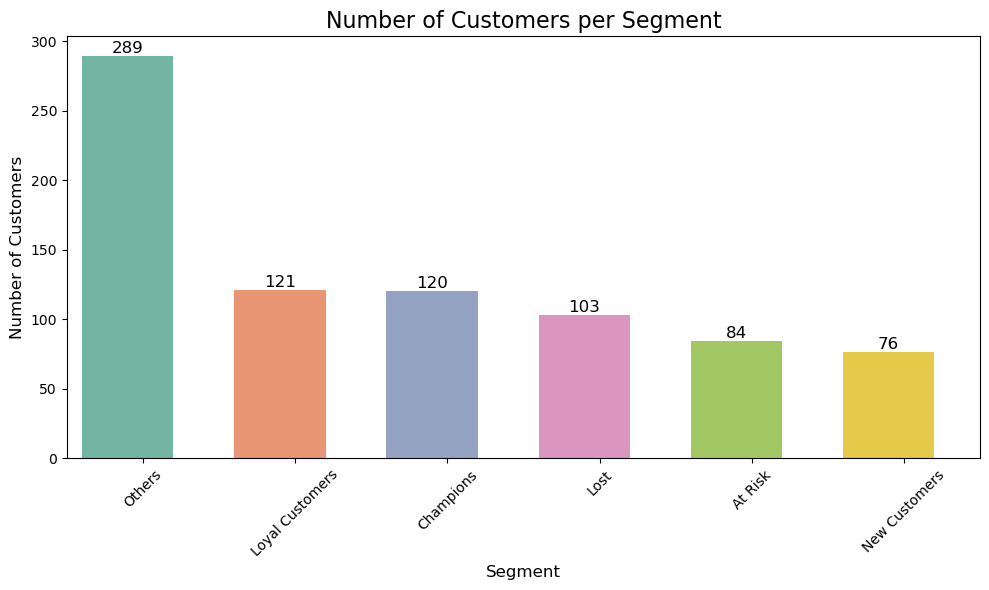

In [29]:
segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

plt.figure(figsize=(10,6))

# Barplot instead of countplot
ax = sns.barplot(
    data=segment_counts,
    x='Segment',
    y='Count',
    palette=sns.color_palette("Set2", len(segment_counts))
)

# Increase bar width
for bar in ax.patches:
    bar.set_width(0.6)

# Annotate values on top of bars
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center', va='bottom', fontsize=12
    )

plt.title('Number of Customers per Segment', fontsize=16)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Segment', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


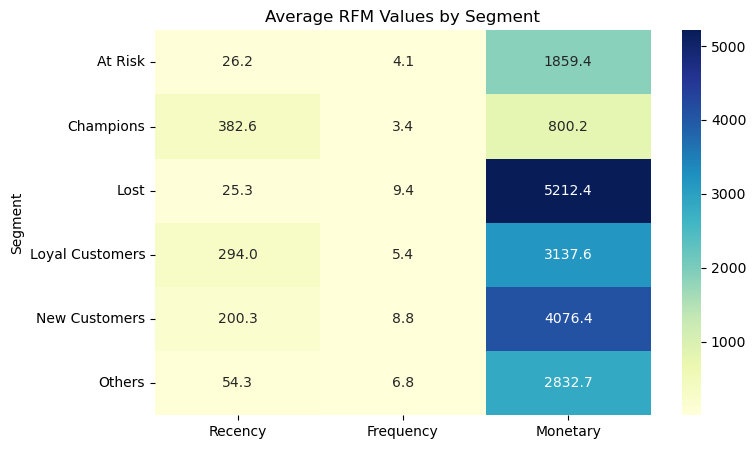

In [23]:
rfm_avg = rfm.groupby('Segment')[['Recency','Frequency','Monetary']].mean()

plt.figure(figsize=(8,5))
sns.heatmap(rfm_avg, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Average RFM Values by Segment')
plt.show()


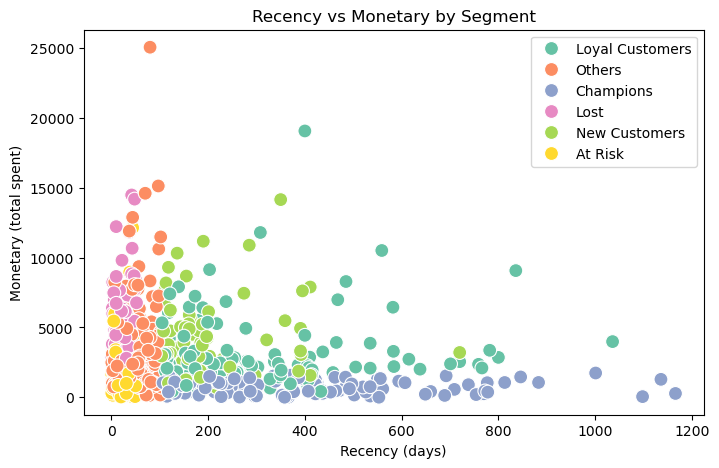

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set2', s=100)
plt.title('Recency vs Monetary by Segment')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary (total spent)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()


### 8. Save the RFM Results
We save the final RFM results into the `processed` folder for future use or visualization.
This ensures the data is organized and ready for reporting or dashboard creation.


In [15]:

rfm.to_csv(os.path.join(processed_dir, 'rfm_output.csv'), index=False)

print("✅ RFM file saved to:", os.path.join(processed_dir, 'rfm_output.csv'))


✅ RFM file saved to: C:\Users\Tasha\Desktop\ADVANCED PROGRAM\superstore\data\processed\rfm_output.csv
